## Step 3:
#### Coregistration

This step associates input points with the trench sample points. For a given input point's coordinates, this script tries to find the nearest trench point within a certain region. If found, the subduction convergence kinematics statistics of the trench point will be associated with the input point. The coregistered data will be processed and used as input for machine learning models later.

Relevant parameters in [parameters.py](parameters.py):

* input_file
* output_dir
* regions
* vector_files
* grid_files


In [1]:
import coregistration
import requests, os

if not os.path.isdir('.AgeGrids'):
    os.system('mkdir AgeGrids')
    
url_temp='https://www.earthbyte.org/webdav/ftp/Data_Collections/Muller_etal_2016_AREPS/Muller_etal_2016_AREPS_Agegrids/Muller_etal_2016_AREPS_Agegrids_v1.15/netCDF-4_0-230Ma/EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid-{}.nc'
file_temp='./AgeGrids/EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid-{}.nc'
print('Downloading age grids...')
for time in range(231):
    if not os.path.isfile(file_temp.format(time)):
        myfile = requests.get(url_temp.format(time))
        open(file_temp.format(time), 'wb').write(myfile.content)
        #print('saving '+file_temp.format(time))

#run the coregistration script
coregistration.main()
#some files should have been created at this point
#let's move to next cell

region of interest: 5
the length of input data is: 92540
region of interest: 10
the length of input data is: 7300
region of interest: 5
the length of input data is: 92540
region of interest: 10
the length of input data is: 0
The coregistration output data have been saved in folder coreg_output successfully!
Time taken: 91.529381275177  seconds


In [2]:
import subprocess

# now, let's see what files have been created
o = subprocess.check_output(['ls', '-ltlh', './coreg_output'])
print(str(o).replace('\\n','\n')[2:-2])

import pandas as pd

#this file contains the sea floor ages retrieved from age
data_1 = pd.read_csv("./coreg_output/0_grid_EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid.out", 
                   header=None, names=['lon', 'lat', 'region', 'sea floor age']) 
data_1.head()#let's print the first 5 rows

total 20M
-rw-rw-r-- 1 mchin mchin 2.2M Mar  9 13:36 0_grid_EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid.out
-rw-rw-r-- 1 mchin mchin  13M Mar  9 13:35 0_vector_subStats.out
-rw-rw-r-- 1 mchin mchin 2.8M Mar  9 13:35 coregistration_input_data_example.csv
-rw-rw-r-- 1 mchin mchin 1.7K Mar  9 13:35 readme.pls
-rw-rw-r-- 1 mchin mchin 2.8M Feb 17 12:45 input_data_example.csv


,lon,lat,region,sea floor age
0,-65.22,-27.06,5.0,37.51
1,-53.94,-50.18,5.0,15.32
2,-67.52,-29.97,5.0,37.32
3,-65.06,-26.82,5.0,40.20
4,-65.20,-26.93,5.0,39.70


The columns in 0_vector_subStats.out:

* 0 reconstructed input point lon
* 1 reconstructed input point lat
* 2 distance to the nearest trench point
* 3 trench point lon
* 4 trench point lat
* 5 subducting convergence (relative to trench) velocity magnitude (in cm/yr)
* 6 subducting convergence velocity obliquity angle (angle between trench normal vector and convergence velocity vector)
* 7 trench absolute (relative to anchor plate) velocity magnitude (in cm/yr)
* 8 trench absolute velocity obliquity angle (angle between trench normal vector and trench absolute velocity vector)
* 9 length of arc segment (in degrees) that current point is on
* 10 trench normal azimuth angle (clockwise starting at North, ie, 0 to 360 degrees) at current point
* 11 subducting plate ID
* 12 trench plate ID
* 13 distance (in degrees) along the trench line to the nearest trench edge
* 14 the distance (in degrees) along the trench line from the start edge of the trench
* 15 convergence velocity orthogonal (in cm/yr)
* 16 convergence velocity parallel  (in cm/yr)
* 17 the trench plate absolute velocity orthogonal (in cm/yr)
* 18 the trench plate absolute velocity orthogonal (in cm/yr)
* 19 the subducting plate absolute velocity magnitude (in cm/yr)
* 20 the subducting plate absolute velocityobliquity angle (in degrees)
* 21 the subducting plate absolute velocity orthogonal
* 22 the subducting plate absolute velocity parallel


In [3]:
#this file contains attributes from Subduction Convergence Kinematics Statistics
#see the list above
data_2 = pd.read_csv("./coreg_output/0_vector_subStats.out", header=None) 
data_2.head()#let's print the first 5 rows

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-65.22,-27.06,0.08,-70.50,-26.45,10.88,-14.88,1.86,156.60,0.2,...,21.35,21.35,10.51,-2.79,-1.71,0.74,-9.04,-13.09,8.81,-2.05
1,-53.94,-50.18,0.05,-57.88,-49.44,2.72,-20.72,2.31,-133.74,0.2,...,4.78,4.78,2.54,-0.96,-1.60,-1.67,-2.78,-70.37,0.93,-2.62
2,-67.52,-29.97,0.04,-70.12,-29.79,11.88,-12.51,2.56,177.24,0.2,...,18.90,18.90,11.60,-2.57,-2.55,0.12,-9.37,-15.11,9.05,-2.44
3,-65.06,-26.82,0.08,-69.97,-26.30,10.87,-14.77,1.85,157.04,0.2,...,25.37,25.37,10.51,-2.77,-1.71,0.72,-9.04,-13.05,8.81,-2.04
4,-65.20,-26.93,0.08,-70.15,-26.35,10.87,-14.81,1.86,156.89,0.2,...,23.14,23.14,10.51,-2.78,-1.71,0.73,-9.04,-13.07,8.81,-2.04


In [4]:
#this is the coregistration input file that we have created in step 2
#the input file was copied into the output folder for future reference.
data_3 = pd.read_csv("./coreg_output/input_data_example.csv", header=None, 
                     names=['index', 'lon', 'lat', 'age', 'plate id']) 
data_3.head()#let's print the first 5 rows

,index,lon,lat,age,plate id
0,0,-66.28,-27.37,6,201
1,1,-69.37,-31.30,230,201
2,2,-69.75,-30.50,12,201
3,3,-66.65,-27.27,9,201
4,4,-66.61,-27.33,8,201


#### Now, we can see, for each input point, a number of new properties have been retrieved from Subduction Convergence Kinematics Statistics and age grids.
Let's plot some maps

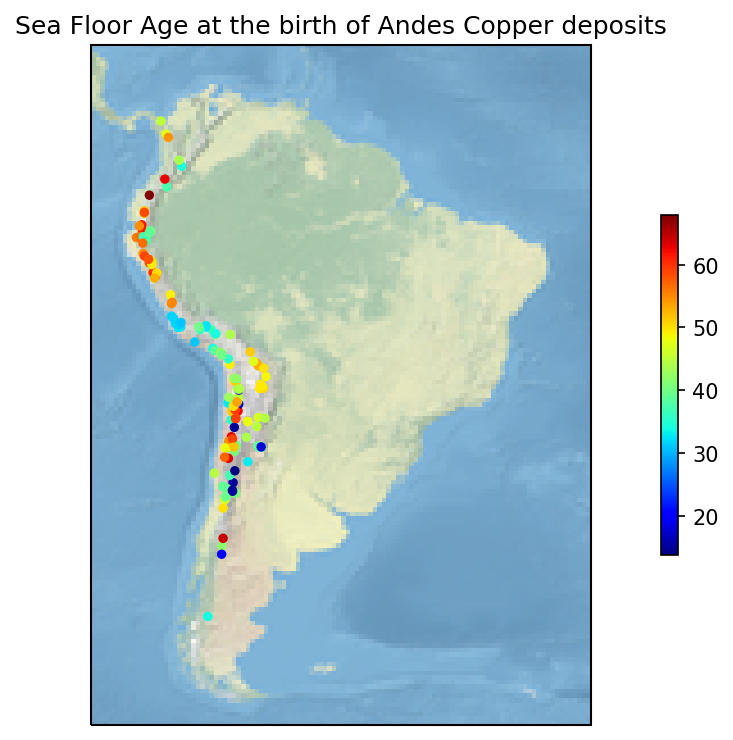

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-85, -30, -55, 15])
#ax.set_extent([-180, 180, -90, 90])

cb = ax.scatter(data_3.loc[:155,'lon'], data_3.loc[:155,'lat'], 50, marker='.',
                c=data_1.loc[:155,'sea floor age'],  cmap=plt.cm.jet)

plt.title('Sea Floor Age at the birth of Andes Copper deposits')
fig.colorbar(cb, shrink=0.5)
plt.show()

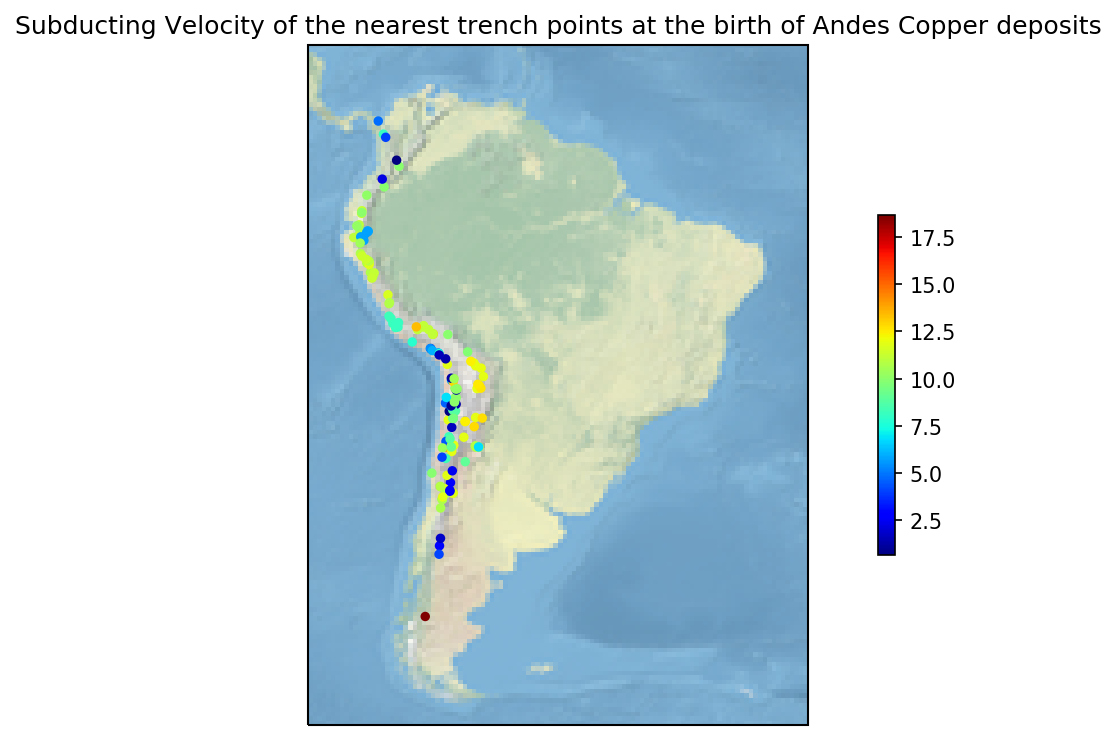

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-85, -30, -55, 15])
#ax.set_extent([-180, 180, -90, 90])

cb = ax.scatter(data_3.loc[:155,'lon'], data_3.loc[:155,'lat'], 50, marker='.',
                c=data_2.iloc[:156,5],  cmap=plt.cm.jet)

plt.title('Subducting Velocity of the nearest trench points at the birth of Andes Copper deposits')
fig.colorbar(cb, shrink=0.5)
plt.show()

#### This is the end of step 3 and now open the step 4 notebook
[4_Data_Wrangling.ipynb](4_Data_Wrangling.ipynb)